# Data visualization - IMMOWEB - Κωνσταντινούπολις


## Import

In [1]:
!pip install seaborn --upgrade

In [2]:
!pip install folium

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import matplotlib.ticker as ticker
import folium
import pgeocode
import warnings
import matplotlib
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("./datasets/Kangaroo.csv")

## Check head, shape, columns, types, describe

In [11]:
df.head()

Unnamed: 0          id                                                url  \
0           0  20661494.0  https://www.immoweb.be/en/classified/apartment...   
1           1  20647642.0  https://www.immoweb.be/en/classified/house/for...   
2           2  20644816.0  https://www.immoweb.be/en/classified/apartment...   
3           3  20659813.0  https://www.immoweb.be/en/classified/apartment...   
4           4  20633249.0  https://www.immoweb.be/en/classified/flat-stud...   

        type      subtype  bedroomCount  bathroomCount  province   locality  \
0  APARTMENT    APARTMENT           2.0            1.0  Brussels  Etterbeek   
1      HOUSE        HOUSE           4.0            2.0  Brussels  Etterbeek   
2  APARTMENT    APARTMENT           2.0            1.0  Brussels  Etterbeek   
3  APARTMENT    APARTMENT           2.0            2.0  Brussels  Bruxelles   
4  APARTMENT  FLAT_STUDIO           1.0            1.0  Brussels  Etterbeek   

   postCode  ...  hasOffice  toiletCount  hasSwimmingPool hasFireplace  \
0      1040  ...        NaN          1.0              NaN          NaN   
1      1040  ...       True          3.0              NaN          NaN   
2      1040  ...        NaN          1.0              NaN          NaN   
3      1040  ...        NaN          2.0              NaN          NaN   
4      1040  ...        NaN          1.0              NaN          NaN   

  hasTerrace terraceSurface  terraceOrientation accessibleDisabledPeople  \
0       True            7.0                 NaN                      NaN   
1       True            1.0                 NaN                      NaN   
2       True            2.0                 NaN                      NaN   
3       True            3.0                 NaN                      NaN   
4        NaN            NaN                 NaN                      NaN   

  epcScore     price  
0        C  399000.0  
1        E  895000.0  
2        F  465000.0  
3        B  590000.0  
4        E  289000.0  

[5 rows x 53 columns]

In [12]:
df.shape

(80368, 53)

In [13]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'type', 'subtype', 'bedroomCount',
       'bathroomCount', 'province', 'locality', 'postCode', 'habitableSurface',
       'roomCount', 'monthlyCost', 'hasAttic', 'hasBasement',
       'hasDressingRoom', 'diningRoomSurface', 'hasDiningRoom',
       'buildingCondition', 'buildingConstructionYear', 'facedeCount',
       'floorCount', 'streetFacadeWidth', 'hasLift', 'floodZoneType',
       'heatingType', 'hasHeatPump', 'hasPhotovoltaicPanels',
       'hasThermicPanels', 'kitchenSurface', 'kitchenType', 'landSurface',
       'hasLivingRoom', 'livingRoomSurface', 'hasBalcony', 'hasGarden',
       'gardenSurface', 'gardenOrientation', 'parkingCountIndoor',
       'parkingCountOutdoor', 'hasAirConditioning', 'hasArmoredDoor',
       'hasVisiophone', 'hasOffice', 'toiletCount', 'hasSwimmingPool',
       'hasFireplace', 'hasTerrace', 'terraceSurface', 'terraceOrientation',
       'accessibleDisabledPeople', 'epcScore', 'price'],
      dtype='object')

In [14]:
df.dtypes

Unnamed: 0                    int64
id                          float64
url                          object
type                         object
subtype                      object
bedroomCount                float64
bathroomCount               float64
province                     object
locality                     object
postCode                      int64
habitableSurface            float64
roomCount                   float64
monthlyCost                 float64
hasAttic                     object
hasBasement                  object
hasDressingRoom              object
diningRoomSurface           float64
hasDiningRoom                object
buildingCondition            object
buildingConstructionYear    float64
facedeCount                 float64
floorCount                  float64
streetFacadeWidth           float64
hasLift                      object
floodZoneType                object
heatingType                  object
hasHeatPump                  object
hasPhotovoltaicPanels       

In [15]:
df.describe()

Unnamed: 0            id  bedroomCount  bathroomCount      postCode  \
count   80368.000000  8.036800e+04  73558.000000   66672.000000  80368.000000   
mean   209681.710133  1.952922e+07      3.008877       1.427121   5266.587199   
std    105460.844153  2.897688e+06      1.833185       4.556189   3045.698904   
min         0.000000  1.882546e+06      1.000000       1.000000   1000.000000   
25%    181965.750000  2.035055e+07      2.000000       1.000000   2330.000000   
50%    235124.500000  2.052985e+07      3.000000       1.000000   4830.000000   
75%    257006.250000  2.061494e+07      4.000000       2.000000   8420.000000   
max    446550.000000  2.066439e+07    100.000000    1146.000000   9992.000000   

       habitableSurface     roomCount  monthlyCost  diningRoomSurface  \
count      67783.000000  21948.000000          0.0        6901.000000   
mean         178.499993      7.110443          NaN          21.124620   
std          820.878936      5.824088          NaN          43.536167   
min            6.000000      1.000000          NaN           1.000000   
25%           93.000000      1.000000          NaN          14.000000   
50%          140.000000      6.000000          NaN          18.000000   
75%          200.000000     11.000000          NaN          24.000000   
max       185347.000000     68.000000          NaN        2470.000000   

       buildingConstructionYear  ...    landSurface  livingRoomSurface  \
count              49106.000000  ...   39541.000000       28950.000000   
mean                1978.017350  ...    1289.410637          37.134715   
std                   41.595504  ...    5657.080544         209.681277   
min                 1753.000000  ...       1.000000           1.000000   
25%                 1957.000000  ...     218.000000          25.000000   
50%                 1980.000000  ...     461.000000          32.000000   
75%                 2017.000000  ...     963.000000          40.000000   
max                 2055.000000  ...  580608.000000       34418.000000   

       hasBalcony  gardenSurface  parkingCountIndoor  parkingCountOutdoor  \
count         0.0   15958.000000        28239.000000         18326.000000   
mean          NaN     696.321156            6.677751             8.280803   
std           NaN    6308.715326          430.014870           746.151955   
min           NaN       1.000000            1.000000             1.000000   
25%           NaN      55.000000            1.000000             1.000000   
50%           NaN     171.000000            1.000000             2.000000   
75%           NaN     518.000000            1.000000             3.000000   
max           NaN  734674.000000        50000.000000        101010.000000   

       toiletCount  terraceSurface  accessibleDisabledPeople         price  
count  55094.00000    28599.000000                       0.0  7.637000e+04  
mean       1.80624       24.512710                       NaN  4.476061e+05  
std        8.41452       43.244643                       NaN  5.115757e+05  
min        1.00000        1.000000                       NaN  3.141000e+03  
25%        1.00000        8.000000                       NaN  2.300000e+05  
50%        2.00000       15.000000                       NaN  3.299000e+05  
75%        2.00000       29.000000                       NaN  4.790000e+05  
max     1958.00000     2921.000000                       NaN  1.500000e+07  

[8 rows x 24 columns]

## Cleaning

In [16]:
# remove unnamed and urls
df = df.drop(columns=["Unnamed: 0", "url"])

### Check missing values 

In [17]:
print(f"NAN values : \n{df.isna().sum()}")
print("Percentage of nan values : ")
print((df.isna().mean() * 100).round(2).astype(str) + ' %')

NAN values : 
id                              0
type                            0
subtype                         0
bedroomCount                 6810
bathroomCount               13696
province                        0
locality                        0
postCode                        0
habitableSurface            12585
roomCount                   58420
monthlyCost                 80368
hasAttic                    67852
hasBasement                 51053
hasDressingRoom             77740
diningRoomSurface           73467
hasDiningRoom               66227
buildingCondition           22376
buildingConstructionYear    31262
facedeCount                 27129
floorCount                  42822
streetFacadeWidth           64858
hasLift                     61324
floodZoneType               35902
heatingType                 33215
hasHeatPump                 72895
hasPhotovoltaicPanels       72320
hasThermicPanels            77256
kitchenSurface              56105
kitchenType                 38452


### These columns have a lot of nan (will delete these columns):
- monthlyCost : 100%
- hasBalcony : 100%
- accessibleDisabledPeople : 100%
- roomCount : 84,51%
- diningRoomSurface : 88.57%
- streetFacadeWidth : 74.13%
- gardenOrientation: 91.37%
- kitcenSurface : 63%
- floorCount : 63%
- hasDiningRoom : 82%
- hasDressingRoom : 96.7%
- hasAttic : 84%

In [18]:
df = df.drop(columns=['monthlyCost', 'hasBalcony', 'accessibleDisabledPeople', 'roomCount', 'diningRoomSurface', 
                      'streetFacadeWidth', 'gardenOrientation', 'kitchenSurface', 'floorCount', 'hasDiningRoom', 
                      'hasDressingRoom', 'hasAttic'])

In [19]:
# check duplicates and delete them

df.duplicated(subset=["id"]).sum()
dups = df.pivot_table(index = ['id'], aggfunc ='size')
print(dups[dups > 1]) 

df = df.drop_duplicates(subset=["id"], keep="first")

id
20663057.0    2
dtype: int64


### Change true to 1, NaN and False to 0

In [20]:
binary_cols = [
    'hasBasement', 'hasLift', 'hasHeatPump', 'hasPhotovoltaicPanels', 
    'hasAirConditioning', 'hasArmoredDoor', 'hasVisiophone', 'hasOffice', 
    'hasSwimmingPool', 'hasFireplace', 'parkingCountIndoor', 'parkingCountOutdoor'
]

for col in binary_cols:
    df[col] = df[col].map({True: 1, False: 0, 'True': 1, 'False': 0}).fillna(0).astype(int)

# Colonnes dépendantes d'autres colonnes
df['hasLivingRoom'] = df['hasLivingRoom'].map({True: 1, False: 0, 'True': 1, 'False': 0})
df.loc[df['hasLivingRoom'].isna(), 'hasLivingRoom'] = df['livingRoomSurface'].notnull().astype(int)

df['hasGarden'] = df['hasGarden'].map({True: 1, False: 0, 'True': 1, 'False': 0})
df.loc[df['hasGarden'].isna(), 'hasGarden'] = df['gardenSurface'].notnull().astype(int)

df['hasTerrace'] = df['hasTerrace'].map({True: 1, False: 0, 'True': 1, 'False': 0})
df.loc[df['hasTerrace'].isna(), 'hasTerrace'] = df['terraceSurface'].notnull().astype(int)

df['hasGarden'] = df['hasGarden'].map({True: 1, False: 0, 'True': 1, 'False': 0})

# When hasLivingRoom = 0 ; livingRoomSurface = 0
df.loc[df['hasLivingRoom'] == 0, 'livingRoomSurface'] = 0

# When hasGarden = 0 ; gardenSurface = 0
df.loc[df['hasGarden'] == 0, 'gardenSurface'] = 0

# When hasTerrace = 0 ; terraceSurface = 0 and terraceOrientation = 0
df.loc[df['hasTerrace'] == 0, 'terraceSurface'] = 0
df.loc[df['hasTerrace'] == 0, 'terraceOrientation'] = 0

#drop number of facade bigger than 4 and transform "facedeCount" into "facadeCount"
df['facadeCount'] = df['facedeCount']
df = df.drop(columns='facedeCount')
df['facadeCount'] = df['facadeCount'].fillna(2)
df = df[df['facadeCount'] <= 4]

print(df.shape)

(80313, 39)


### Drop rows without prices
And check shape

In [21]:
df = df.dropna(subset="price")
df.shape

(76315, 39)

### Check wich columns stil have missing values

In [22]:
print("Percentage of nan values : ")
print((df.isna().mean() * 100).round(2).astype(str) + ' %')

Percentage of nan values : 
id                            0.0 %
type                          0.0 %
subtype                       0.0 %
bedroomCount                 3.68 %
bathroomCount               12.71 %
province                      0.0 %
locality                      0.0 %
postCode                      0.0 %
habitableSurface            11.24 %
hasBasement                   0.0 %
buildingCondition           24.08 %
buildingConstructionYear    35.72 %
hasLift                       0.0 %
floodZoneType               43.83 %
heatingType                 38.27 %
hasHeatPump                   0.0 %
hasPhotovoltaicPanels         0.0 %
hasThermicPanels            95.94 %
kitchenType                 45.12 %
landSurface                 48.26 %
hasLivingRoom                 0.0 %
livingRoomSurface           18.22 %
hasGarden                     0.0 %
gardenSurface                 0.0 %
parkingCountIndoor            0.0 %
parkingCountOutdoor           0.0 %
hasAirConditioning            0.0 %


### Lets fill the other missing values

In [23]:
# bedroomCount : lets assume that they have at least one so fill nan by 1
df['bedroomCount'] = df['bedroomCount'].fillna(1).astype(float)

# bathroomCount same as bedrooms
df['bathroomCount'] = df['bathroomCount'].fillna(1).astype(float)

# toiletCount same as bedrooms
df['toiletCount'] = df['toiletCount'].fillna(1).astype(float)

# habitableSurface : replace by median 
df['habitableSurface'] = df['habitableSurface'].fillna(df['habitableSurface'].median())

# buildingCondition : replace by 'NOT_MENTIONED
df['buildingCondition'] = df['buildingCondition'].fillna('NOT_MENTIONED')

# buildingConstructionYear
df['buildingConstructionYear'] = df['buildingConstructionYear'].fillna(df['buildingConstructionYear'].median()).astype(int)


# floodZoneType lts assume that missing values are NON_FLOOD_ZONE
df['floodZoneType'] = df['floodZoneType'].fillna('NON_FLOOD_ZONE')

# heatingType
df['heatingType'] = df['heatingType'].fillna(df['heatingType'].mode()[0])

# hasThermicPanels lets assume that if its not precised, there are not
df['hasThermicPanels'] = df['hasThermicPanels'].fillna(0).astype(float)

# kitchenType
df['kitchenType'] = df['kitchenType'].fillna(df['kitchenType'].mode()[0])

# landSurface
df['landSurface'] = df['landSurface'].fillna(df['landSurface'].median())

# livingRoomSurface
df['livingRoomSurface'] = df['livingRoomSurface'].fillna(df['livingRoomSurface'].median())

# terraceSurface
median_terrace = df.loc[(df['hasTerrace'] == 1) & (df['terraceSurface'].notnull()), 'terraceSurface'].median()
df.loc[(df['hasTerrace'] == 1) & (df['terraceSurface'].isna()), 'terraceSurface'] = median_terrace
df.loc[(df['hasTerrace'] != 1) & (df['terraceSurface'].isna()), 'terraceSurface'] = 0

# terraceOrientation
mode_terrace = df.loc[(df['hasTerrace'] == 1), 'terraceOrientation'].mode()[0]
df.loc[(df['hasTerrace'] == 1) & (df['terraceOrientation'].isna()), 'terraceOrientation'] = mode_terrace
df.loc[(df['hasTerrace'] != 1) & (df['terraceOrientation'].isna()), 'terraceOrientation'] = 'NO_TERRACE'

# epcScore
epc_order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
df = df[df['epcScore'].isin(epc_order)]
df['epcScore'] = df['epcScore'].fillna(df['epcScore'].mode()[0])

In [24]:
df.head()

id       type      subtype  bedroomCount  bathroomCount  province  \
0  20661494.0  APARTMENT    APARTMENT           2.0            1.0  Brussels   
1  20647642.0      HOUSE        HOUSE           4.0            2.0  Brussels   
2  20644816.0  APARTMENT    APARTMENT           2.0            1.0  Brussels   
3  20659813.0  APARTMENT    APARTMENT           2.0            2.0  Brussels   
4  20633249.0  APARTMENT  FLAT_STUDIO           1.0            1.0  Brussels   

    locality  postCode  habitableSurface  hasBasement  ... hasOffice  \
0  Etterbeek      1040             100.0            1  ...         0   
1  Etterbeek      1040             270.0            1  ...         1   
2  Etterbeek      1040              87.0            0  ...         0   
3  Bruxelles      1040             104.0            0  ...         0   
4  Etterbeek      1040              71.0            0  ...         0   

   toiletCount  hasSwimmingPool hasFireplace hasTerrace  terraceSurface  \
0          1.0                0            0        1.0             7.0   
1          3.0                0            0        1.0             1.0   
2          1.0                0            0        1.0             2.0   
3          2.0                0            0        1.0             3.0   
4          1.0                0            0        0.0             0.0   

   terraceOrientation  epcScore     price  facadeCount  
0               SOUTH         C  399000.0          1.0  
1               SOUTH         E  895000.0          2.0  
2               SOUTH         F  465000.0          2.0  
3               SOUTH         B  590000.0          2.0  
4                   0         E  289000.0          2.0  

[5 rows x 39 columns]

### Transform data types

In [25]:
def transform_data_types(df, col_types):
    for col, dtype in col_types.items():
        df[col] = df[col].astype(dtype)
    return df

col_types = {'id': 'int', 'type': 'str', 'subtype': 'str', 'bedroomCount': 'int', 'bathroomCount': 'int',
             'province': 'str', 'locality': 'str', 'postCode': 'int', 'habitableSurface': 'float', 
             'hasBasement': 'int', 'buildingCondition': 'str',
             'buildingConstructionYear': 'int', 'hasLift': 'int', 'floodZoneType': 'str',
             'heatingType': 'str', 'hasHeatPump': 'int', 'hasPhotovoltaicPanels': 'int', 'hasThermicPanels': 'int',
             'kitchenType': 'str', 'landSurface': 'float', 'hasLivingRoom': 'int', 'livingRoomSurface': 'float',
             'hasGarden': 'int', 'gardenSurface': 'float', 'parkingCountIndoor': 'int', 'parkingCountOutdoor': 'int',
             'hasAirConditioning': 'int', 'hasArmoredDoor': 'int', 'hasVisiophone': 'int', 'hasOffice': 'int', 
             'toiletCount': 'int', 'hasSwimmingPool': 'int', 'hasFireplace': 'int', 'hasTerrace': 'int', 'terraceSurface': 'float',
             'terraceOrientation': 'str', 'epcScore': 'str', 'price': 'float', 'facadeCount': 'int'}

df = transform_data_types(df, col_types)

print(df.dtypes)

id                            int64
type                         object
subtype                      object
bedroomCount                  int64
bathroomCount                 int64
province                     object
locality                     object
postCode                      int64
habitableSurface            float64
hasBasement                   int64
buildingCondition            object
buildingConstructionYear      int64
hasLift                       int64
floodZoneType                object
heatingType                  object
hasHeatPump                   int64
hasPhotovoltaicPanels         int64
hasThermicPanels              int64
kitchenType                  object
landSurface                 float64
hasLivingRoom                 int64
livingRoomSurface           float64
hasGarden                     int64
gardenSurface               float64
parkingCountIndoor            int64
parkingCountOutdoor           int64
hasAirConditioning            int64
hasArmoredDoor              

In [26]:
print("Percentage of nan values : ")
print((df.isna().mean() * 100).round(2).astype(str) + ' %')

Percentage of nan values : 
id                          0.0 %
type                        0.0 %
subtype                     0.0 %
bedroomCount                0.0 %
bathroomCount               0.0 %
province                    0.0 %
locality                    0.0 %
postCode                    0.0 %
habitableSurface            0.0 %
hasBasement                 0.0 %
buildingCondition           0.0 %
buildingConstructionYear    0.0 %
hasLift                     0.0 %
floodZoneType               0.0 %
heatingType                 0.0 %
hasHeatPump                 0.0 %
hasPhotovoltaicPanels       0.0 %
hasThermicPanels            0.0 %
kitchenType                 0.0 %
landSurface                 0.0 %
hasLivingRoom               0.0 %
livingRoomSurface           0.0 %
hasGarden                   0.0 %
gardenSurface               0.0 %
parkingCountIndoor          0.0 %
parkingCountOutdoor         0.0 %
hasAirConditioning          0.0 %
hasArmoredDoor              0.0 %
hasVisiophone       

## No Other Missing Values
### Let's Visualize all of this !

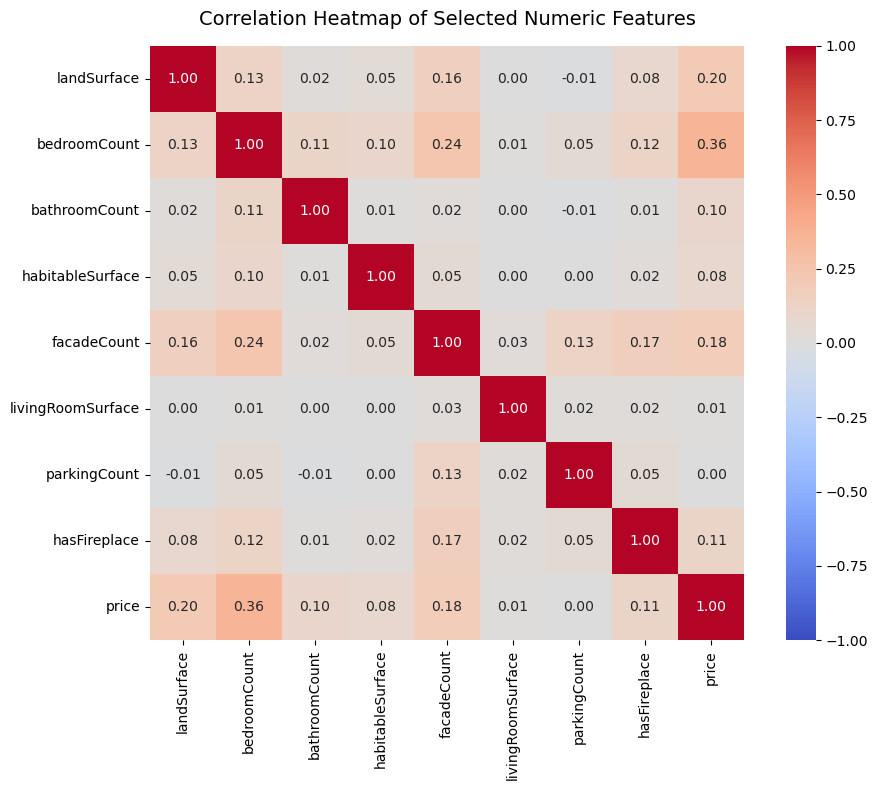

In [27]:
numeric_2_df = df.copy()
numeric_2_df['parkingCount'] = numeric_2_df['parkingCountIndoor'] + numeric_2_df['parkingCountOutdoor']

numeric_2_df = numeric_2_df[['landSurface','bedroomCount','bathroomCount',  'habitableSurface', 'facadeCount', 
                             'livingRoomSurface', 'parkingCount', 'hasFireplace', 'price']]

correlation_2_df = numeric_2_df.corr()

plt.figure(figsize=(10, 8))
axis_corr = sns.heatmap(
    correlation_2_df,
    vmin=-1, vmax=1, center=0,
    fmt=".2f",  
    cmap='coolwarm',
    square=True,
    annot=True  # pour afficher les coefficients de corrélation
)

plt.title('Correlation Heatmap of Selected Numeric Features', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

## Prices histogram

In [ ]:
def get_region(zip_code):
    if 1000 <= zip_code <= 1299:
        return "Bruxelles"
    elif 1300 <= zip_code <= 1499 or 4000 <= zip_code <= 7999:
        return "Wallonia"
    else:
        return "Flanders"
    
df['region'] = df['postCode'].apply(get_region)

In [ ]:
df_cheap = df[df['price'] <= 1000000]
df_expensive = df[df['price'] > 1000000]

df_cheap['group'] = 'Cheap'
df_expensive['group'] = 'Expensive'

df_combined = pd.concat([df_cheap, df_expensive])

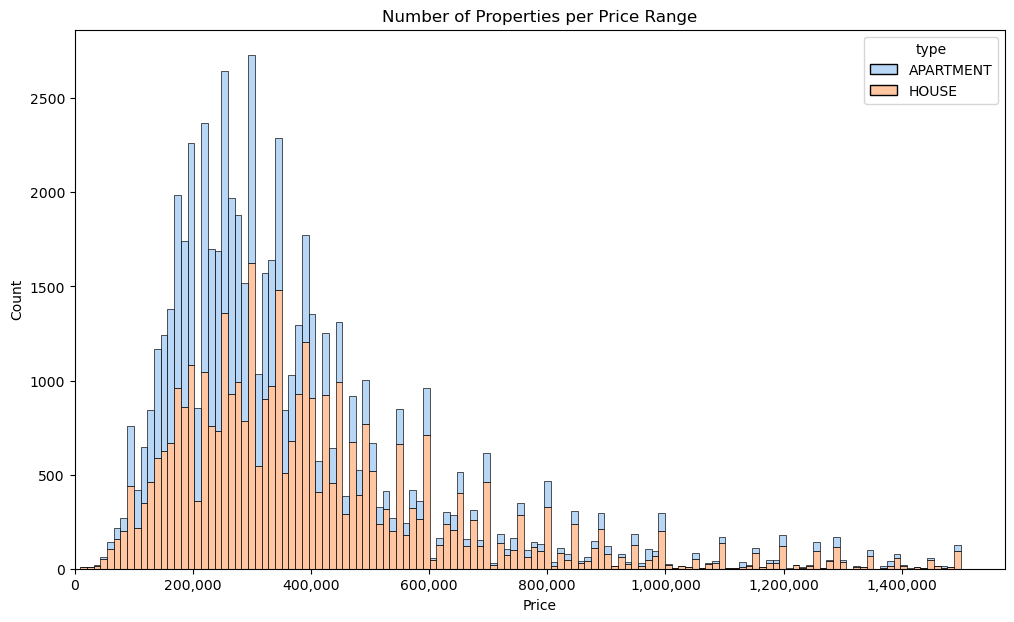

In [100]:
f = plt.figure(figsize=(12,7))
ax = f.add_subplot(1,1,1)


sns.histplot(data=df_combined[df_combined["price"]<1500000], ax=ax, stat="count", multiple="stack",
             x="price", kde=False,
             palette="pastel", hue="type",
             element="bars", legend=True)
ax.set_xlim(left=0)
ax.set_title("Number of Properties per Price Range")
ax.set_xlabel("Price")
ax.set_ylabel("Count")


ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

## Price per m^2

In [196]:
df["price_m2"] = df['price']/df['habitableSurface']


print(f"Price per m2 for houses in Belgium: mean = {round(df[df['type']=='HOUSE']['price_m2'].mean(),2)}, median = {round(df[df['type']=='HOUSE']['price_m2'].median(),2)}")
print(f"Price per m2 for apartment in Belgium: mean = {round(df[df['type']=='APARTMENT']['price_m2'].mean(),2)}, median = {round(df[df['type']=='APARTMENT']['price_m2'].median(),2)}")
print()
print(f"Price per m2 for houses in Flanders: mean = {round(df[(df['type']=='HOUSE') & (df['region']=='Flanders')]['price_m2'].mean(),2)}, median = {round(df[(df['type']=='HOUSE') & (df['region']=='Flanders')]['price_m2'].median(),2)}")
print(f"Price per m2 for apartment in Flanders: mean = {round(df[(df['type']=='APARTMENT') & (df['region']=='Flanders')]['price_m2'].mean(),2)}, median = {round(df[(df['type']=='APARTMENT') & (df['region']=='Flanders')]['price_m2'].median(),2)}")
print()
print(f"Price per m2 for houses in Wallonia: mean = {round(df[(df['type']=='HOUSE') & (df['region']=='Wallonia')]['price_m2'].mean(),2)}, median = {round(df[(df['type']=='HOUSE') & (df['region']=='Wallonia')]['price_m2'].median(),2)}")
print(f"Price per m2 for apartment in Wallonia: mean = {round(df[(df['type']=='APARTMENT') & (df['region']=='Wallonia')]['price_m2'].mean(),2)}, median = {round(df[(df['type']=='APARTMENT') & (df['region']=='Wallonia')]['price_m2'].median(),2)}")
print()
print(f"Price per m2 for houses in Brussels: mean = {round(df[(df['type']=='HOUSE') & (df['region']=='Bruxelles')]['price_m2'].mean(),2)}, median = {round(df[(df['type']=='HOUSE') & (df['region']=='Bruxelles')]['price_m2'].median(),2)}")
print(f"Price per m2 for apartment in Brussels: mean = {round(df[(df['type']=='APARTMENT') & (df['region']=='Bruxelles')]['price_m2'].mean(),2)}, median = {round(df[(df['type']=='APARTMENT') & (df['region']=='Bruxelles')]['price_m2'].median(),2)}")

Price per m2 for houses in Belgium: mean = 2290.21, median = 2027.47
Price per m2 for apartment in Belgium: mean = 3781.36, median = 3145.5

Price per m2 for houses in Flanders: mean = 2514.31, median = 2193.45
Price per m2 for apartment in Flanders: mean = 4197.18, median = 3271.64

Price per m2 for houses in Wallonia: mean = 1814.58, median = 1657.14
Price per m2 for apartment in Wallonia: mean = 2515.85, median = 2466.85

Price per m2 for houses in Brussels: mean = 3334.65, median = 2937.49
Price per m2 for apartment in Brussels: mean = 3734.38, median = 3540.74


## Visualization per price range

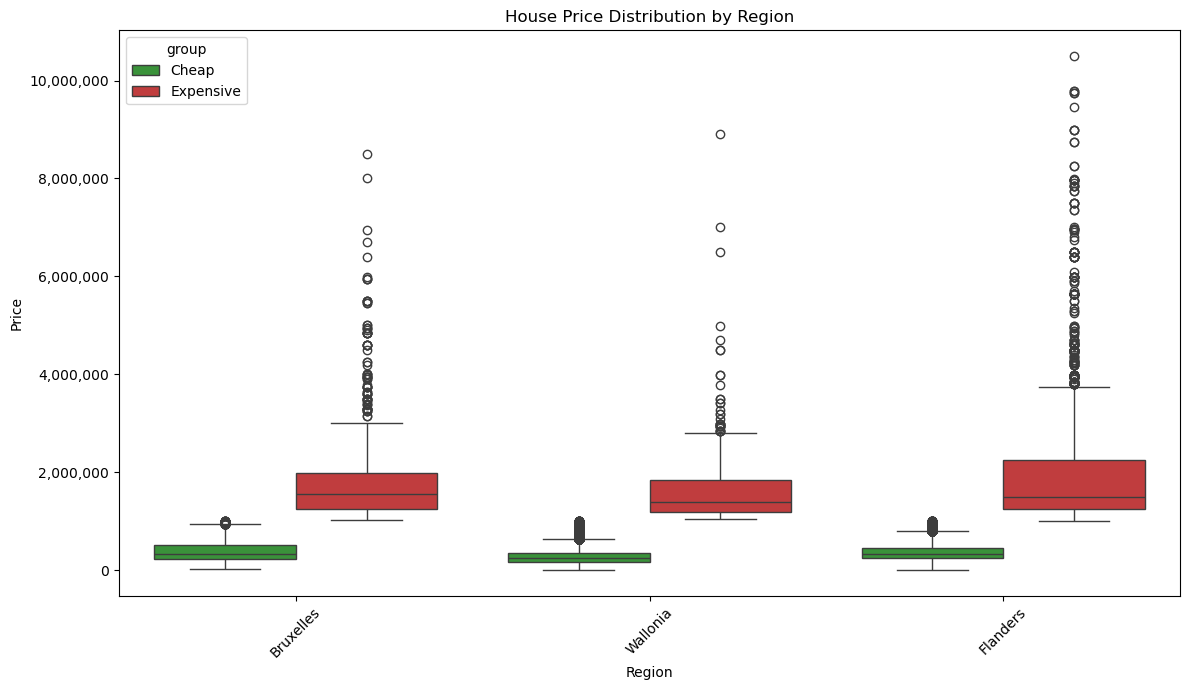

In [121]:
fig, ax = plt.subplots(figsize=(12, 7))

custom_palette = ['#2ca02c', '#d62728']  # red and green

sns.boxplot(data=df_combined, hue='group', x='region', y='price', palette=custom_palette)

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Region')
ax.set_ylabel('Price')
ax.set_title('House Price Distribution by Region')

ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

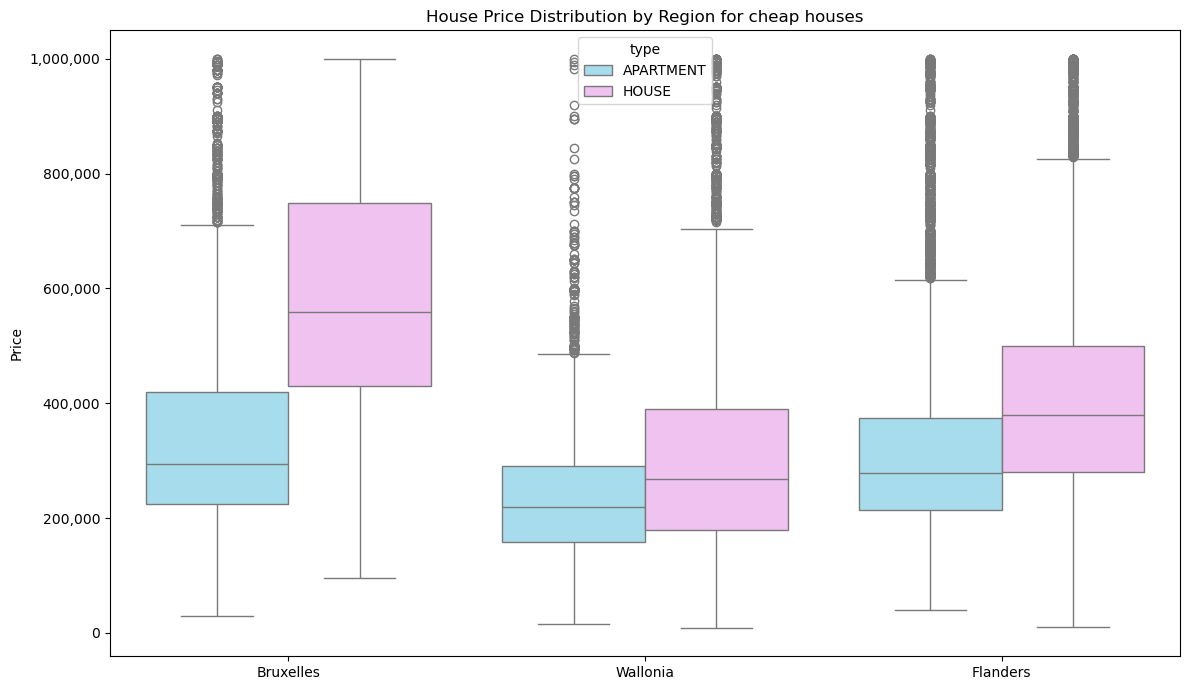

In [122]:
fig, ax = plt.subplots(figsize=(12, 7))

custom_palette = ['#9ce2f7', '#f6baf7']

sns.boxplot(data=df_cheap, hue='type', x='region', y='price', palette=custom_palette)

ax.set_xlabel('')
ax.set_ylabel('Price')
ax.set_title('House Price Distribution by Region for cheap houses')

ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

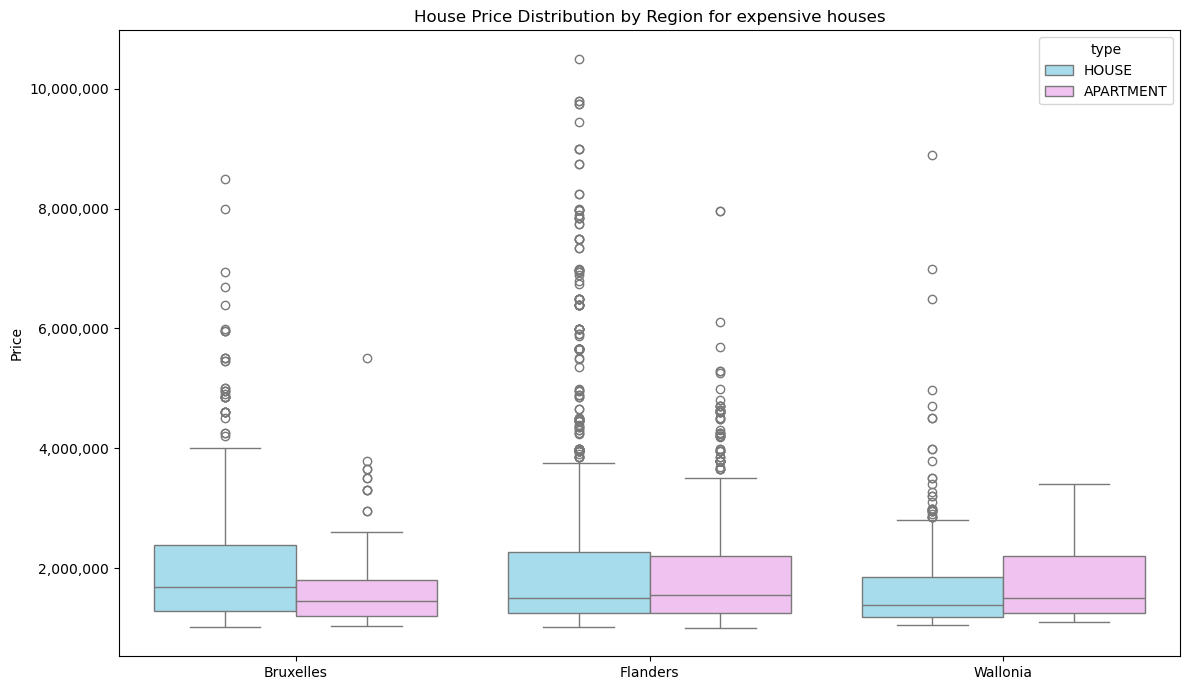

In [123]:
fig, ax = plt.subplots(figsize=(12, 7))

custom_palette = ['#9ce2f7', '#f6baf7']

sns.boxplot(data=df_expensive, hue='type', x='region', y='price', palette=custom_palette)

ax.set_xlabel('')
ax.set_ylabel('Price')
ax.set_title('House Price Distribution by Region for expensive houses')

ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

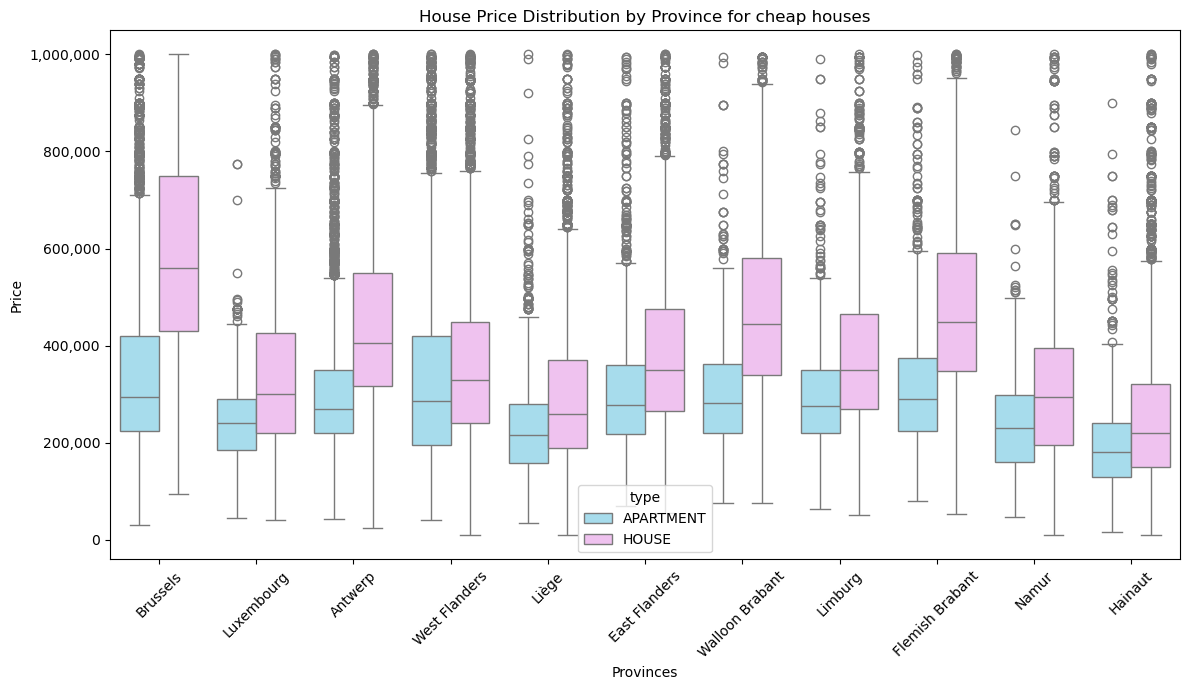

In [124]:
fig, ax = plt.subplots(figsize=(12, 7))

custom_palette = ['#9ce2f7', '#f6baf7']

sns.boxplot(data=df_cheap, hue='type', x='province', y='price', palette=custom_palette)

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Provinces')
ax.set_ylabel('Price')
ax.set_title('House Price Distribution by Province for cheap houses')

ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

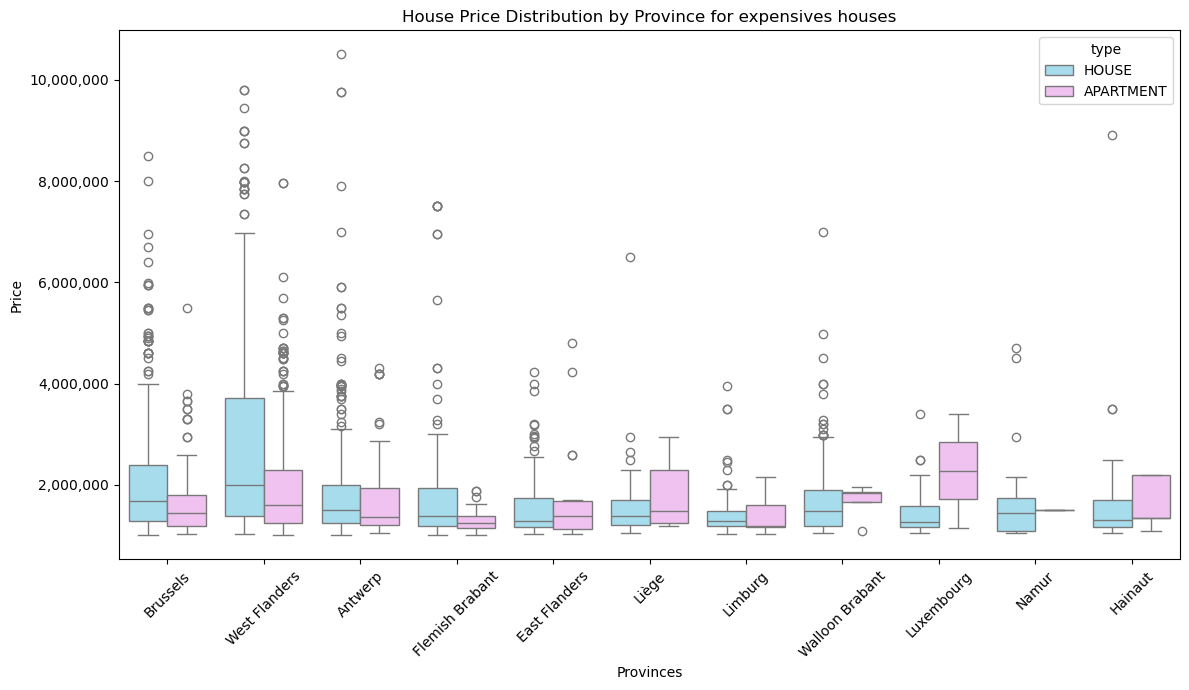

In [125]:
fig, ax = plt.subplots(figsize=(12, 7))

custom_palette = ['#9ce2f7', '#f6baf7']

sns.boxplot(data=df_expensive, hue='type', x='province', y='price', palette=custom_palette)

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Provinces')
ax.set_ylabel('Price')
ax.set_title('House Price Distribution by Province for expensives houses')

ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

## Map with prices

In [155]:
df_aka = pd.read_csv('./datasets/Kangaroo.csv')

nomi = pgeocode.Nominatim('be')

# Get the coordinates 
df_aka['postCode'] = df_aka['postCode'].astype(str)
df_aka["Latitude"] = (nomi.query_postal_code(list(map(str,df_aka["postCode"].tolist()))).latitude)
df_aka["Longitude"] = (nomi.query_postal_code(list(map(str,df_aka["postCode"].tolist()))).longitude)


df_aka_house = df_aka[df_aka['type']=='HOUSE']
df_aka_apartment = df_aka[df_aka['type']=='APARTMENT']

## HOUSES

In [175]:

df_map = df_aka_house.drop_duplicates(subset=["postCode"], keep='first')

center_coordinates =nomi.query_postal_code(5020)  # Get the coordinates of the first row
# Create a map centered around the average latitude and longitude
map_center = df_map[['Latitude', 'Longitude']].mean()

map_plot = folium.Map(location=[center_coordinates.latitude,center_coordinates.longitude], zoom_start=8, control_scale=True)   

color = "yellow"
fill_color = "blue"
html_color = ""

for grp_name, df_grp in df_map.groupby('locality'):
    feature_group = folium.FeatureGroup(grp_name)
    for row in df_grp.itertuples():

        lower_bound = df_aka_house[df_aka_house['postCode'] == row.postCode]['price'].quantile(0.1) # exclude percentile 10e
        upper_bound = df_aka_house[df_aka_house['postCode'] == row.postCode]['price'].quantile(0.9)# exclude percentile 90e

        count = df_aka_house[df_aka_house['postCode'] == row.postCode].shape[0]  # Count occurrences of the postcode in the original DataFram
        if count > 4:
            meanPrice = df_aka_house[df_aka_house['postCode'] == row.postCode][(df_aka_house['price'] <= upper_bound)]["price"].mean()  # Calculate mean price for the postcode
        else:
            meanPrice = df_aka_house[df_aka_house['postCode'] == row.postCode]['price'].mean()

        maxPrice = df_aka_house[df_aka_house['postCode'] == row.postCode]['price'].max()  # Calculate max price for the postcode
        minPrice = df_aka_house[df_aka_house['postCode'] == row.postCode]['price'].min()  # Calculate min price for the postcode

        if meanPrice<350000:
            color = "green"
            fill_color = "green"
            html_color = "#2B952A"
        elif 350000<meanPrice<500000:
            color = "orange"
            fill_color = "orange"
            html_color = "#FFA501"
            
        elif 500000<meanPrice:
            color = "red"
            fill_color = "red"
            html_color = "#FF0000"
        html = f"""
                <h1> <b>{row.postCode} : {grp_name}</b></h1><br>
                <h2><b> Total sells : {count}</b></h2><br>
                <h2> <b> Max Price : {maxPrice:,.0f} €</b></h2><br>
                <h2 style='color:{html_color};'> <b> Mean Price : {meanPrice:,.0f} €</b></h2><br>
                <h2> <b> Min Price : {minPrice:,.0f} €</b></h2><br>
                """
        popup = folium.Popup(html, max_width=350)
        folium.CircleMarker(
            location=[row.Latitude, row.Longitude],
            popup=popup,
            radius=5, # define how big you want the circle markers to be
            color=color,
            fill=True,
            fill_color=fill_color,
            fill_opacity=0.6).add_to(feature_group),
    feature_group.add_to(map_plot)

# Add LayerControl to toggle FeatureGroups
folium.LayerControl().add_to(map_plot)


# Save the map to an HTML file
map_plot.save("map_plot.html")
map_plot

## APARTMENTS

In [174]:

df_map = df_aka_apartment.drop_duplicates(subset=["postCode"], keep='first')

center_coordinates =nomi.query_postal_code(5020)  # Get the coordinates of the first row
# Create a map centered around the average latitude and longitude
map_center = df_map[['Latitude', 'Longitude']].mean()

map_plot = folium.Map(location=[center_coordinates.latitude,center_coordinates.longitude], zoom_start=8, control_scale=True)   

color = "yellow"
fill_color = "blue"
html_color = ""

for grp_name, df_grp in df_map.groupby('locality'):
    feature_group = folium.FeatureGroup(grp_name)
    for row in df_grp.itertuples():

        lower_bound = df_aka_apartment[df_aka_apartment['postCode'] == row.postCode]['price'].quantile(0.1) # exclude percentile 10e
        upper_bound = df_aka_apartment[df_aka_apartment['postCode'] == row.postCode]['price'].quantile(0.9)# exclude percentile 90e

        count = df_aka_apartment[df_aka_apartment['postCode'] == row.postCode].shape[0]  # Count occurrences of the postcode in the original DataFram
        if count > 4:
            meanPrice = df_aka_apartment[df_aka_apartment['postCode'] == row.postCode][(df_aka_apartment['price'] <= upper_bound)]["price"].mean()  # Calculate mean price for the postcode
        else:
            meanPrice = df_aka_apartment[df_aka_apartment['postCode'] == row.postCode]['price'].mean()

        maxPrice = df_aka_apartment[df_aka_apartment['postCode'] == row.postCode]['price'].max()  # Calculate max price for the postcode
        minPrice = df_aka_apartment[df_aka_apartment['postCode'] == row.postCode]['price'].min()  # Calculate min price for the postcode
        if meanPrice<350000:
            color = "green"
            fill_color = "green"
            html_color = "#2B952A"
        elif 350000<meanPrice<500000:
            color = "orange"
            fill_color = "orange"
            html_color = "#FFA501"
            
        elif 500000<meanPrice:
            color = "red"
            fill_color = "red"
            html_color = "#FF0000"
        html = f"""
                <h1> <b>{row.postCode} : {grp_name}</b></h1><br>
                <h2><b> Total sells : {count}</b></h2><br>
                <h2> <b> Max Price : {maxPrice:,.0f} €</b></h2><br>
                <h2 style='color:{html_color};'> <b> Mean Price : {meanPrice:,.0f} €</b></h2><br>
                <h2> <b> Min Price : {minPrice:,.0f} €</b></h2><br>
                """
        popup = folium.Popup(html, max_width=350)
        folium.CircleMarker(
            location=[row.Latitude, row.Longitude],
            popup=popup,
            radius=5, # define how big you want the circle markers to be
            color=color,
            fill=True,
            fill_color=fill_color,
            fill_opacity=0.6).add_to(feature_group),
    feature_group.add_to(map_plot)

# Add LayerControl to toggle FeatureGroups
folium.LayerControl().add_to(map_plot)


# Save the map to an HTML file
map_plot.save("map_plot.html")
map_plot

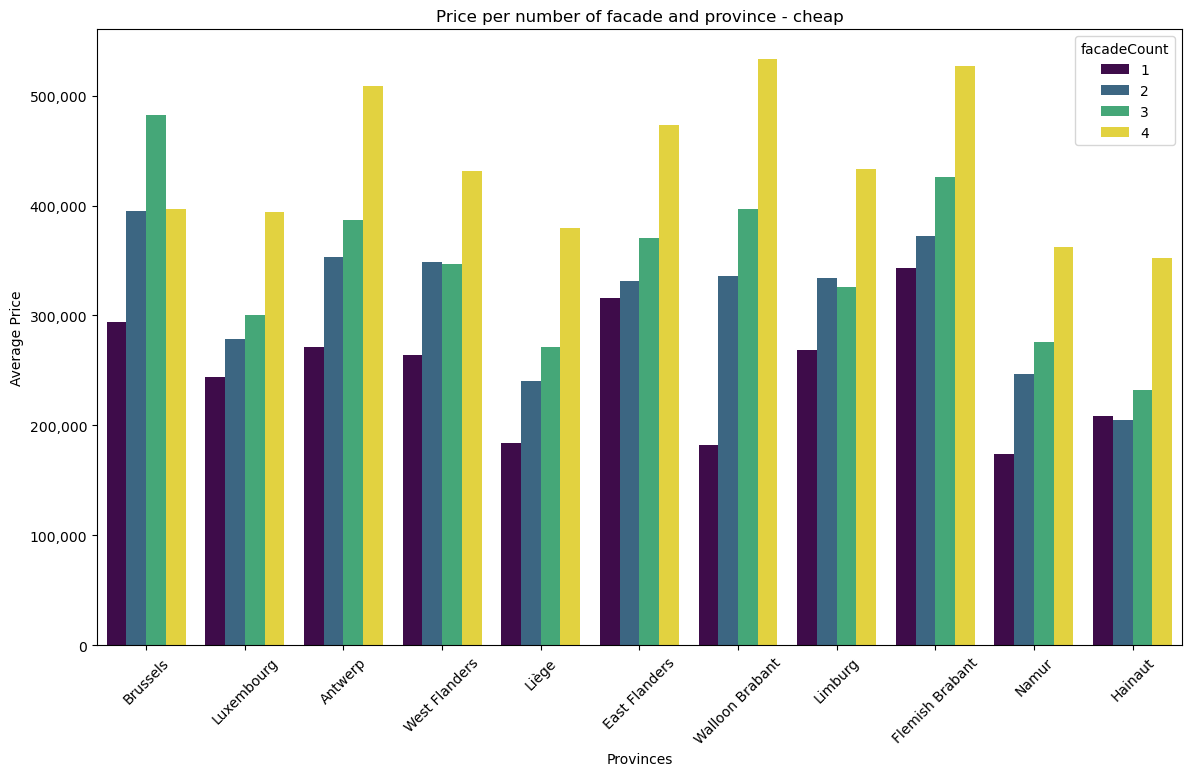

In [126]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(data=df_cheap, x='province', y='price', hue='facadeCount', palette='viridis', errorbar=None)

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Provinces')
ax.set_ylabel('Average Price')
ax.set_title('Price per number of facade and province - cheap')

ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

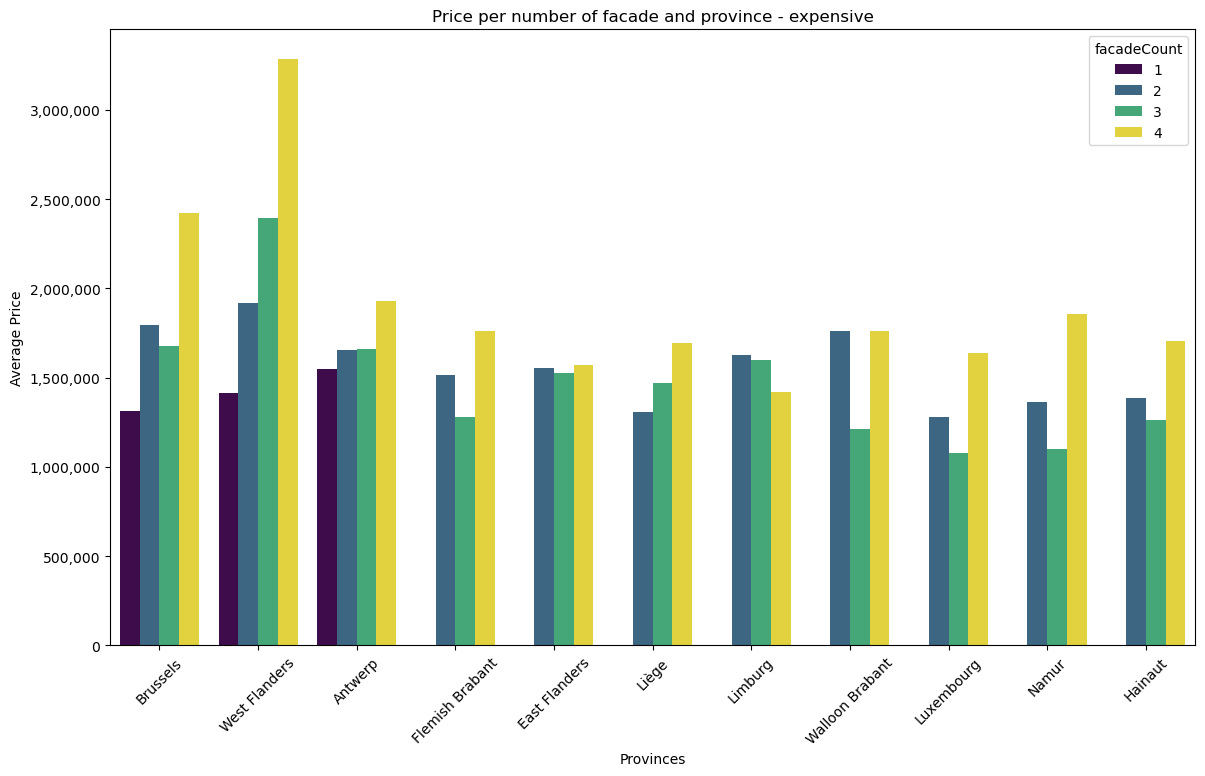

In [127]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(data=df_expensive, x='province', y='price', hue='facadeCount', palette='viridis', errorbar=None)

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Provinces')
ax.set_ylabel('Average Price')
ax.set_title('Price per number of facade and province - expensive')

ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

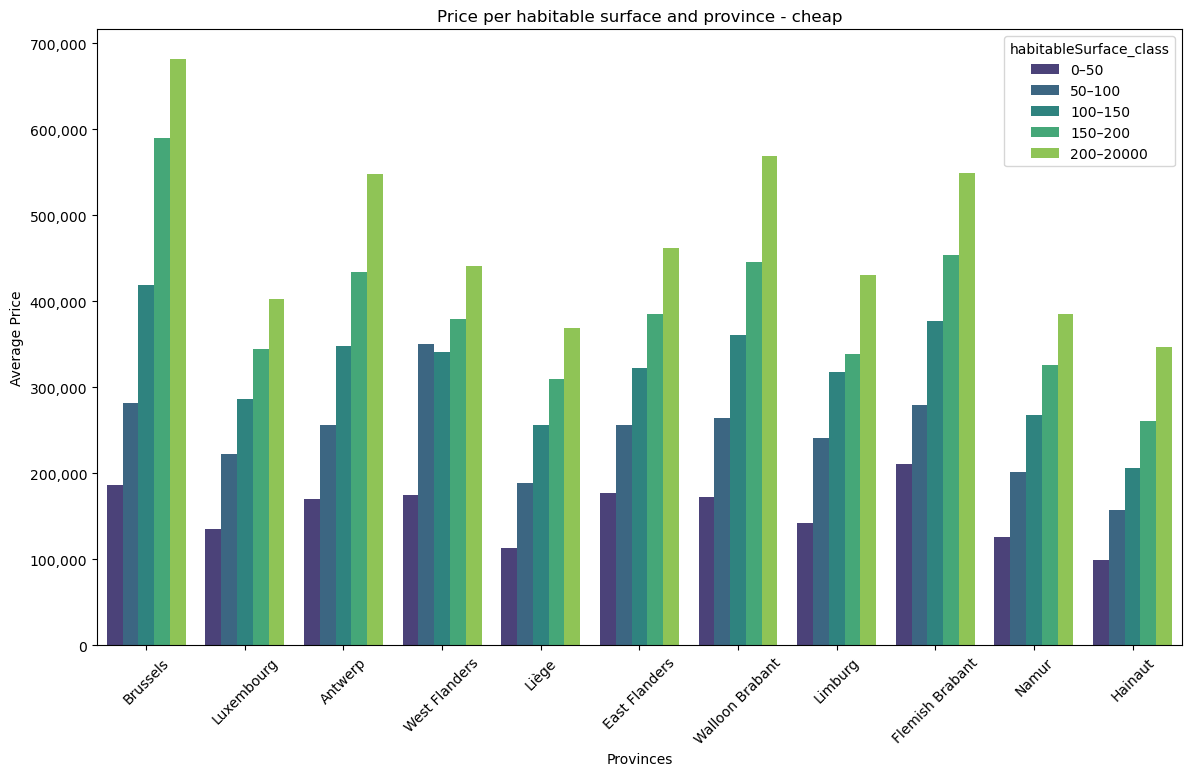

In [128]:
df_cheap['habitableSurface_class'] = pd.cut(df_cheap['habitableSurface'], bins=[0, 50, 100, 150, 200, 300], 
                             labels=['0–50', '50–100', '100–150', '150–200', '200–20000'])

fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(data=df_cheap, x='province', y='price', hue='habitableSurface_class', palette='viridis', errorbar=None)

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Provinces')
ax.set_ylabel('Average Price')
ax.set_title('Price per habitable surface and province - cheap')

ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

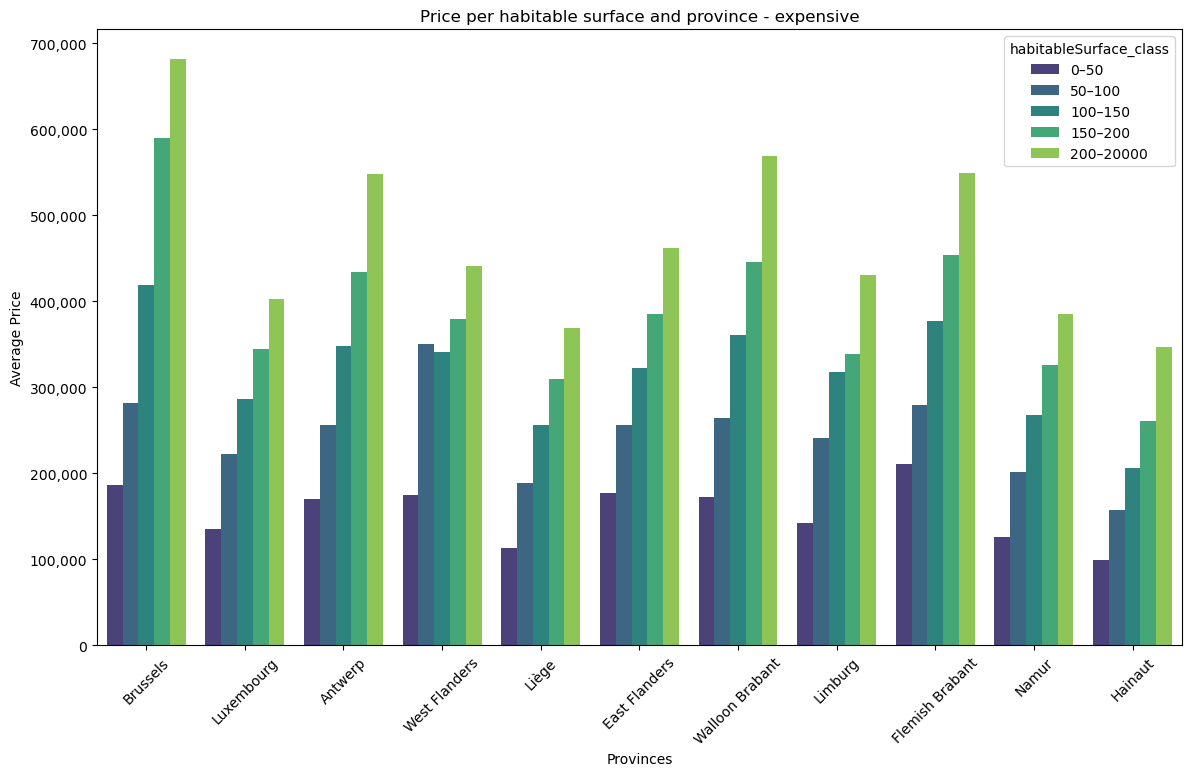

In [130]:
df_expensive['habitableSurface_class'] = pd.cut(df_expensive['habitableSurface'], bins=[0, 50, 100, 150, 200, 300], 
                             labels=['0–50', '50–100', '100–150', '150–200', '200–20000'])

fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(data=df_cheap, x='province', y='price', hue='habitableSurface_class', palette='viridis', errorbar=None)

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Provinces')
ax.set_ylabel('Average Price')
ax.set_title('Price per habitable surface and province - expensive')

ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

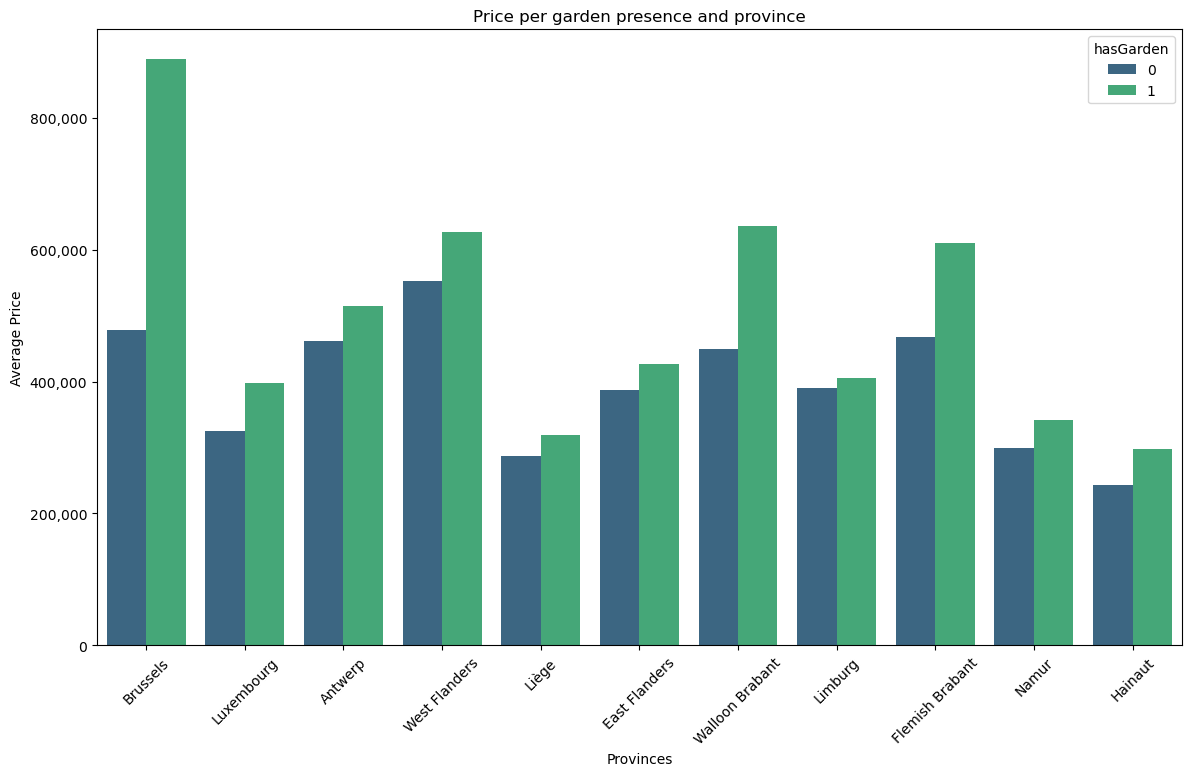

In [132]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(data=df, x='province', y='price', hue='hasGarden', palette='viridis', errorbar=None)

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Provinces')
ax.set_ylabel('Average Price')
ax.set_title('Price per garden presence and province')

ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()


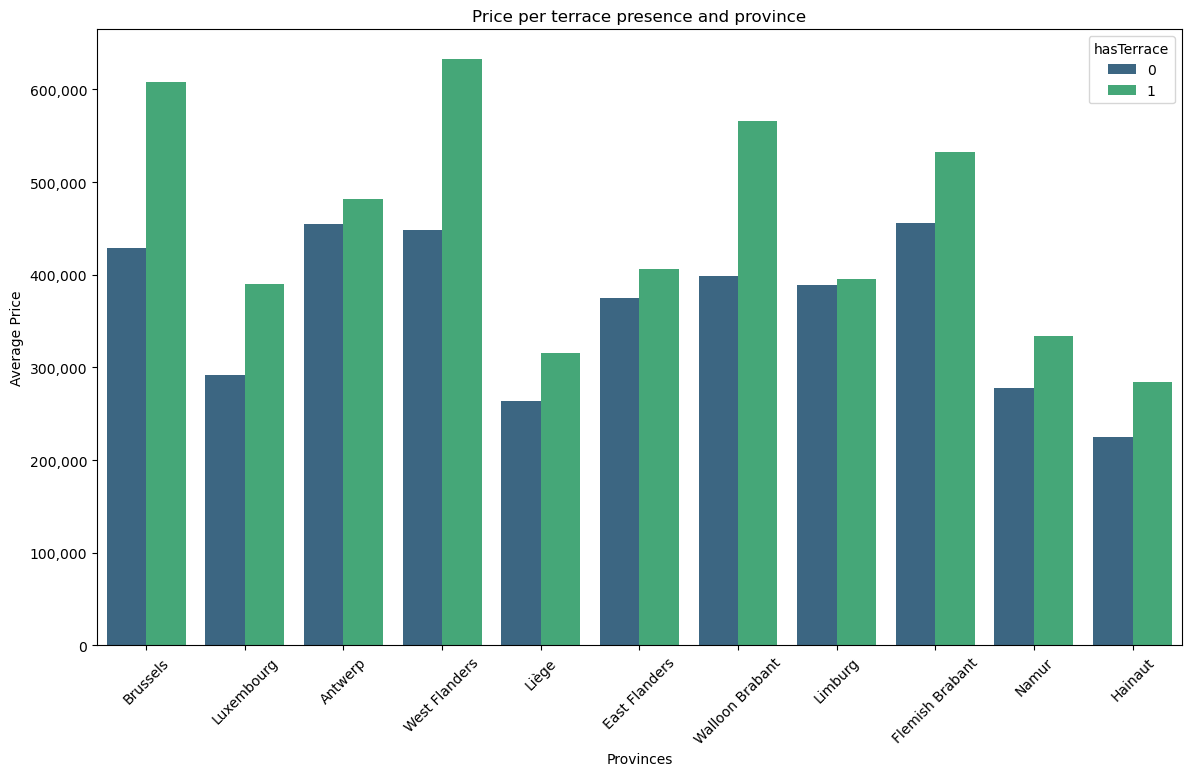

In [133]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(data=df, x='province', y='price', hue='hasTerrace', palette='viridis', errorbar=None)

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Provinces')
ax.set_ylabel('Average Price')
ax.set_title('Price per terrace presence and province')

ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()